In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## 1. Data preprocessing 

In [3]:
data = pd.read_csv("zestawy danych/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
data.isna().describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [8]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [9]:
data["Ad Topic Line"].value_counts()

Quality-focused maximized extranet           1
Monitored 24/7 moratorium                    1
Enhanced systemic benchmark                  1
Profound bottom-line standardization         1
Quality-focused bi-directional throughput    1
                                            ..
Integrated motivating neural-net             1
Re-contextualized reciprocal interface       1
Focused fresh-thinking Graphic Interface     1
Proactive client-server productivity         1
Pre-emptive client-driven secured line       1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [13]:
data["Country"].value_counts()

Czech Republic      9
France              9
Australia           8
Cyprus              8
Liberia             8
                   ..
Cape Verde          1
Marshall Islands    1
Jordan              1
Montserrat          1
Slovenia            1
Name: Country, Length: 237, dtype: int64

In [7]:
data["Clicked on Ad"].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [16]:
#Selecting numerical variables columns
num_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
data[num_cols].head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,61833.90,256.09
1,80.23,31,68441.85,193.77
2,69.47,26,59785.94,236.50
3,74.15,29,54806.18,245.89
4,68.37,35,73889.99,225.58


array([[<AxesSubplot:title={'center':'Daily Time Spent on Site'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Area Income'}>,
        <AxesSubplot:title={'center':'Daily Internet Usage'}>]],
      dtype=object)

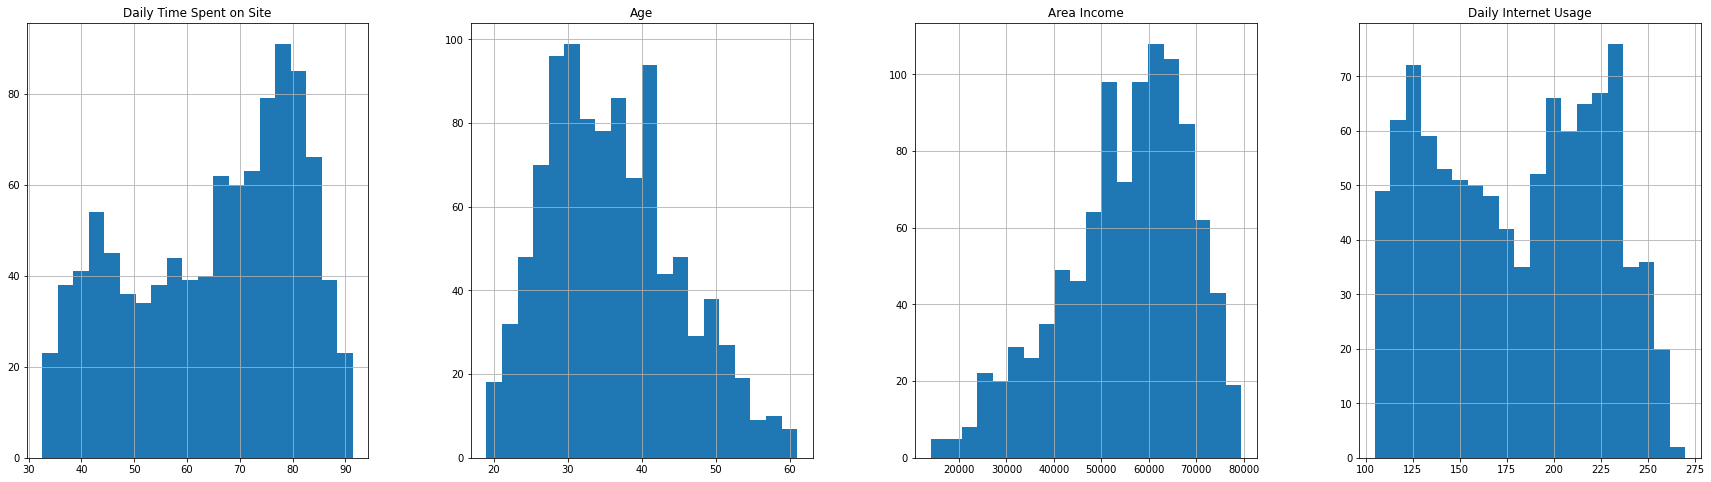

In [31]:
data[num_cols].hist(bins=20, figsize=(30,8), layout=(1,4))

In [25]:
# Min-Max scaling 
from sklearn.preprocessing import MinMaxScaler

mns = MinMaxScaler()
x = mns.fit_transform(data[num_cols])
X = pd.DataFrame(x, columns=num_cols)
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,0.617882,0.380952,0.730472,0.916031
1,0.809621,0.285714,0.831375,0.538746
2,0.626721,0.166667,0.699200,0.797433
3,0.706272,0.238095,0.623160,0.854280
4,0.608023,0.380952,0.914568,0.731323


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Male'] = data['Male']
X['Country'] = le.fit_transform(data['Country'])
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country
0,0.617882,0.380952,0.730472,0.916031,0,215
1,0.809621,0.285714,0.831375,0.538746,1,147
2,0.626721,0.166667,0.699200,0.797433,0,184
3,0.706272,0.238095,0.623160,0.854280,1,103
4,0.608023,0.380952,0.914568,0.731323,0,96


In [35]:
y = data.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

### Spliting data

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## 2. Learning

### 2.1. Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100)

In [141]:
lr.fit(X_train, y_train)

LogisticRegression(C=100)

In [142]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr, X_train, y_train, cv=3, scoring='accuracy')

array([0.98501873, 0.96254682, 0.96992481])

In [143]:
from sklearn.model_selection import cross_val_predict

y_train_pred_lr = cross_val_predict(lr, X_train, y_train, cv=3)

In [144]:
y_scores_lr = cross_val_predict(lr, X_train, y_train, cv=3, method='decision_function')

### 2.2 Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [146]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [147]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [148]:
y_probs_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method='predict_proba') 

## 3. Metrics

In [149]:
from sklearn.metrics import precision_score, recall_score, f1_score

def display_scores(y_train, y_train_pred):
    print("Precision score: ", precision_score(y_train, y_train_pred))
    print("Recall score: ", recall_score(y_train, y_train_pred))
    print("F1_score: ", f1_score(y_train, y_train_pred))

In [150]:
print('Logistic Regression')
display_scores(y_train, y_train_pred_lr)

Logistic Regression
Precision score:  0.97911227154047
Recall score:  0.9640102827763496
F1_score:  0.971502590673575


In [151]:
print("Random Forest")
display_scores(y_train, y_train_pred_forest)

Random Forest
Precision score:  0.96875
Recall score:  0.9562982005141388
F1_score:  0.96248382923674


In [152]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

def plot_metrics(y_train, y_scores):

    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
    fpr, tpr, thr = roc_curve(y_train, y_scores)

    plt.figure(figsize=(30,7))

    plt.subplot(1,3,1)
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.xlim(min(thresholds),max(thresholds))
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(recalls[:-1], precisions[:-1], 'b', label="Precision/Recalls")
    plt.xlim(0, 1.1)
    plt.xlabel('Recalls')
    plt.ylabel('Precision')
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(fpr, tpr, 'b', linewidth=2, label="ROC")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim(-0.01, 1)
    plt.ylim(-0.01, 1)
    plt.legend()

    plt.show()
    

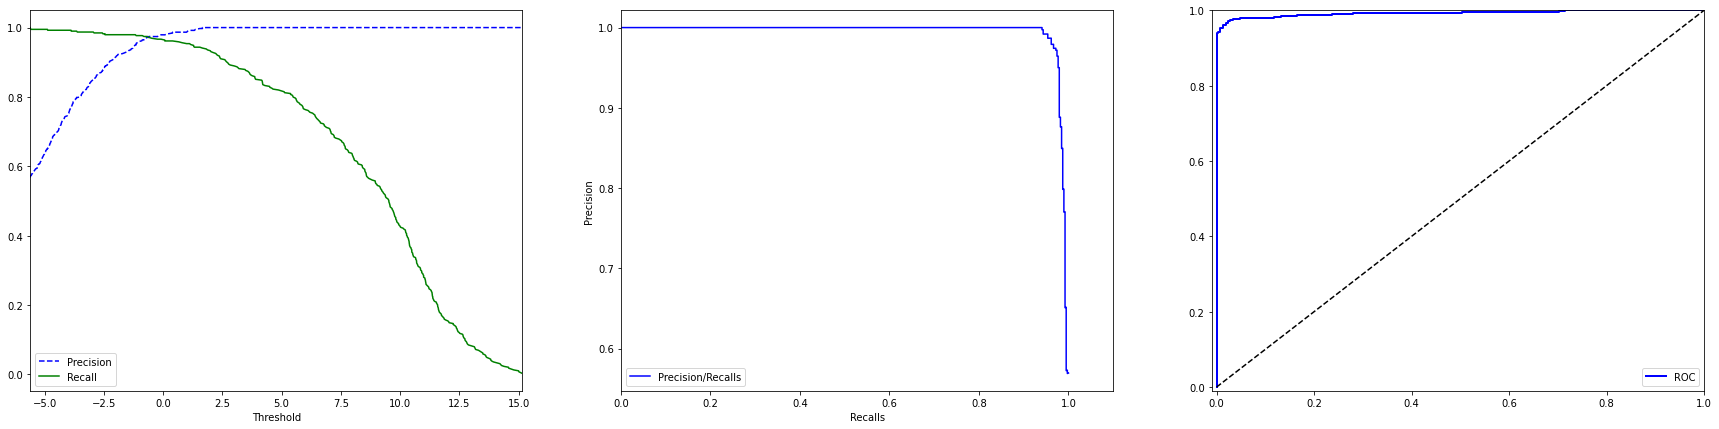

In [153]:
plot_metrics(y_train, y_scores)

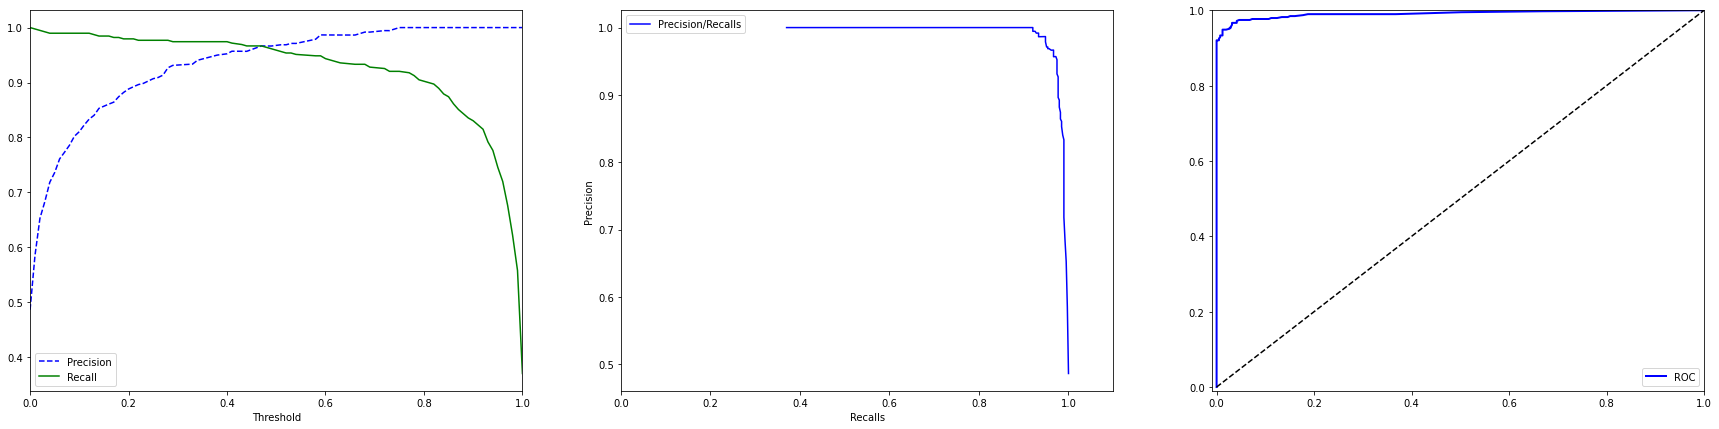

In [154]:
plot_metrics(y_train, y_probs_forest[:,1])



## 4. Testing

In [155]:
print('Logistic Regression')
print(lr.score(X_test, y_test))
print('Random Forest')
print(forest_clf.score(X_test, y_test))

Logistic Regression
0.96
Random Forest
0.935
